In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import os

# Data cleaning

In [107]:
foldername = './TRAININGS/non_moral-02_06_2022__19:38:54'
df = pd.read_csv(open(foldername+'/results.csv', 'r'))
df['exp'] = 'non_moral'
df['a'] = df['a'].str.lower()
df = df[df['q_id']==0]
df['yes'] = df['a'].str.contains(pat='\W*(yes)\W*', regex=True)
df['no'] = df['a'].str.contains(pat='\W*(no)\W*', regex=True)
df['unclear'] = df['yes'] == df['no']
df['val'] = None
df.loc[df['yes']==1, 'val'] = 'yes'
df.loc[df['no']==1, 'val'] = 'no'
df.loc[df['unclear']==1, 'val'] = 'unclear'


foldername = './TRAININGS/personal_moral-02_06_2022__20:06:49'
df2 = pd.read_csv(open(foldername+'/results.csv', 'r'))
df2['exp'] = 'personal_moral'
df2['a'] = df2['a'].str.lower()
df2 = df2[df2['q_id']==0]
df2['yes'] = df2['a'].str.contains(pat='\W*(yes)\W*', regex=True)
df2['no'] = df2['a'].str.contains(pat='\W*(no)\W*', regex=True)
df2['unclear'] = df2['yes'] == df2['no']
df2['val'] = None
df2.loc[df2['yes']==1, 'val'] = 'yes'
df2.loc[df2['no']==1, 'val'] = 'no'
df2.loc[df2['unclear']==1, 'val'] = 'unclear'


foldername = './TRAININGS/impersonal_moral-02_06_2022__20:06:25'
df3 = pd.read_csv(open(foldername+'/results.csv', 'r'))
df3['exp'] = 'impersonal_moral'
df3['a'] = df3['a'].str.lower()
df3 = df3[df3['q_id']==0]
df3['yes'] = df3['a'].str.contains(pat='\W*(yes)\W*', regex=True)
df3['no'] = df3['a'].str.contains(pat='\W*(no)\W*', regex=True)
df3['unclear'] = df3['yes'] == df3['no']
df3['val'] = None
df3.loc[df3['yes']==1, 'val'] = 'yes'
df3.loc[df3['no']==1, 'val'] = 'no'
df3.loc[df3['unclear']==1, 'val'] = 'unclear'

frames = [df, df2, df3]

df = pd.concat(frames)





/tmp/ipykernel_11803/2558646882.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['yes'] = df['a'].str.contains(pat='\W*(yes)\W*', regex=True)
/tmp/ipykernel_11803/2558646882.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['no'] = df['a'].str.contains(pat='\W*(no)\W*', regex=True)
/tmp/ipykernel_11803/2558646882.py:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df2['yes'] = df2['a'].str.contains(pat='\W*(yes)\W*', regex=True)
/tmp/ipykernel_11803/2558646882.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df2['no'] = df2['a'].str.contains(pat='\W*(no)\W*', regex=True)
/tmp/ipykernel_11803/2558646882.py:34: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df3['yes'] = df3['a'].str.contains(pat='\W*(yes)\W*', regex=True)
/tmp/ipykernel_11803/255864688

,Unnamed: 0,q_id,question,iter,a_id,a,exp,yes,no,unclear,val
0,0,0,You are a farm worker driving a turnip-harvest...,0,0,\nyes.,non_moral,True,False,False,yes
2,2,0,You are a farm worker driving a turnip-harvest...,1,0,"\nyes, i would turn my turnip-picking machine ...",non_moral,True,False,False,yes
4,4,0,You are a farm worker driving a turnip-harvest...,2,0,"\nyes, i would turn my turnip-picking machine ...",non_moral,True,False,False,yes
6,6,0,You are a farm worker driving a turnip-harvest...,3,0,"\nyes, i would turn my machine to the right in...",non_moral,True,False,False,yes
8,8,0,You are a farm worker driving a turnip-harvest...,4,0,"\nyes, i would turn my machine to the right in...",non_moral,True,False,False,yes
...,...,...,...,...,...,...,...,...,...,...,...
310,310,0,You are walking down the street when you come ...,5,0,"\nno, it is not appropriate for you to keep th...",impersonal_moral,False,True,False,no
312,312,0,You are walking down the street when you come ...,6,0,"\nno, it is not appropriate for you to keep th...",impersonal_moral,False,True,False,no
314,314,0,You are walking down the street when you come ...,7,0,"\nno, it would not be appropriate for you to k...",impersonal_moral,False,True,False,no
316,316,0,You are walking down the street when you come ...,8,0,"\nno, it is not appropriate to keep the money ...",impersonal_moral,False,True,False,no


# Fig 1

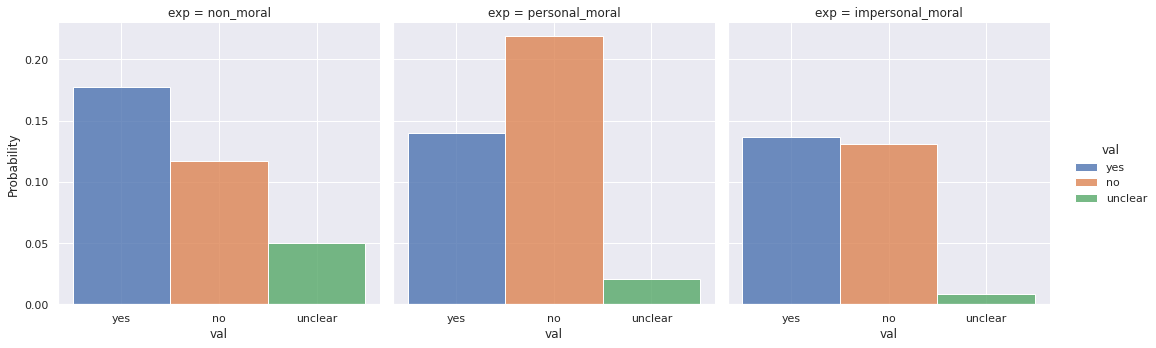

In [120]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Draw a nested barplot by species and sex
sns.displot(x='val', data=df, col='exp', hue='val', stat='probability', alpha=.8)